# Recommendation Systems (Assignment 8)

## Student: Rodolfo Lerma

https://github.com/unguyen14/recommendation_system/blob/main/Movie_recommendation_sys.ipynb

https://github.com/rishabh7795/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb

https://github.com/demirkeseny/movie-recommendation/blob/master/03.content_based_recommender2.ipynb

This assignment, we focus on **content-based recommenders**.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

The data we use in this assignment is a movie meta-data that accompanies the user-movie rating data we used in the lecture. Let's take a look:

In [2]:
df_movies = pd.read_csv('./movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df_movies.shape

(9742, 3)

As we see in the dataframe, there are 9742 rows/movies with 3 columns (`movield`, `title` & `genres`)

In [4]:
df_ratings = pd.read_csv('./ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_ratings.shape

(100836, 4)

### Question 1. Do some exploratory analysis of the data.  Please do at least 3 different analysis.  1 analysis/data exploration should be a visualization of some sort (bar, histogram, boxplot, etc.).

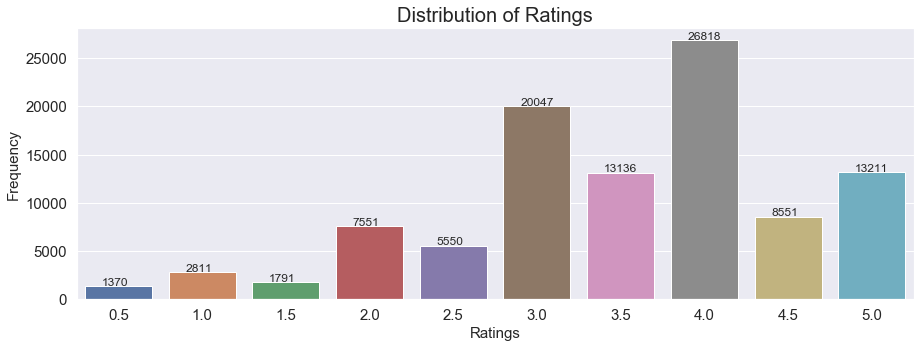

In [6]:
#Data Exploration 1
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

sns.countplot("rating", data=df_ratings, ax=axes)
for p in axes.patches:
    axes.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))
plt.tick_params(labelsize = 15)
plt.title("Distribution of Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

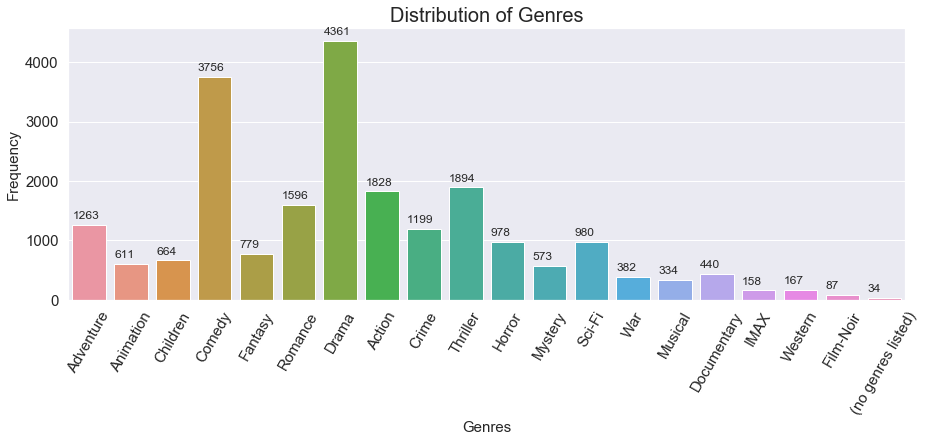

In [7]:
#Data Exploration 2
unique_genres = {}

def ExtractGenres(x):
    for g in x.split("|"):
        if g not in unique_genres.keys():
            unique_genres[g] = 1
        else:
            unique_genres[g] = unique_genres[g] + 1

df_movies["genres"].apply(ExtractGenres)

genres_df = pd.DataFrame(list(unique_genres.items()))
genres_df.columns = ["Genre", "Count"] 

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)

sns.barplot(y="Count", x="Genre", data=genres_df, ax=axes)
#axes.set_yticklabels([changingLabels(num) for num in axes.get_yticks()])
for p in axes.patches:
    axes.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()+100))

plt.tick_params(labelsize = 15)
plt.title("Distribution of Genres", fontsize = 20)
plt.xlabel("Genres", fontsize = 15)
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

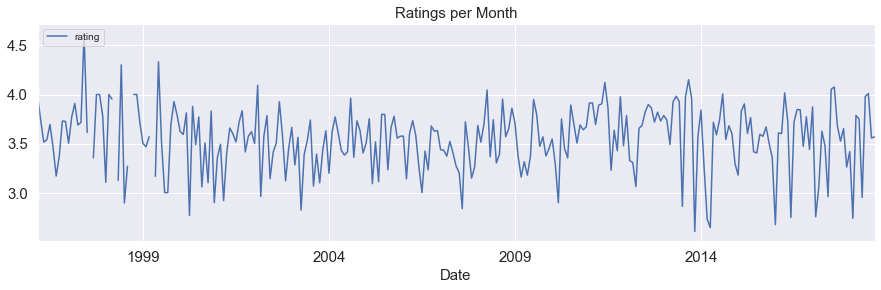

In [8]:
#Data Exploration 3
df_ratings_copy = df_ratings.copy()
df_ratings_copy["timestamp"] = df_ratings_copy["timestamp"].apply(lambda x: datetime.utcfromtimestamp(x).strftime("%Y-%m-%d"))
df_ratings_copy.loc[:, 'timestamp'] = pd.to_datetime(df_ratings_copy.loc[:, 'timestamp'])#df_ratings_copy.set_index('timestamp', inplace = True)
df_ratings_copy.set_index('timestamp', inplace = True)

df_ratings_copy[["rating"]].resample("1M").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Ratings per Month',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

### Question 1.1: Since the `genres` column is not in the right format for us to do comparisons, create a dummy column for each genre. You can use the `str.get_dummies` method to do this.

In [ ]:
#
df_movies = #To Do
df_movies.head()

### Questioin 1.2: Validate Question 1.1 updates by displaying the genres list for the movie `Toy Story (1995)` as the reference movie. Hint: Drop the movieId and title column and transpose the data to make it easier to read.

In [ ]:
movie_chosen = #ToDo
movie_chosen

### Question 1.3: Create a new `DataFrame` that will store the similarity scores. Hint: Compy df_movies for columns movieId and title.

In [ ]:
df_sim = #To Do
df_sim.head()

### Question 2.1: Find all the movies similar to the above movie. The easiest way to do this is by using the `pd.DataFrame.corrwith` method. You can pass `movie_chosen` to this method and specify the correct value for `axis`. The default similarity metric used is Pearson's correlation, so add a new column to the `df_sim` data called `sim_pearson` to store the similarity scores. Show the top 5 rows of the resulting data.

In [ ]:
df_sim['sim_pearson'] = #To Do
df_sim.head()

### Question 2.2: Pearson's correlation may not be the best similarity metric to use with the data we have, so try [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) instead. To specify another similarity function, we can use the `method` argument of `corrwith`. Unforetunately, Jaccard similarity is not one of the default metrics offered, but `method` also accepts functions (referred to as a "callable" in the doc).

- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, using Jaccard similarity. Add the similarity scores to `df_sim` as a new column calld `sim_jaccard` and show the top 5 rows.

In [ ]:
from sklearn.metrics import jaccard_score

df_sim['sim_jaccard'] = #To Do
df_sim.head()

### Question 2.3: Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, but this time use cosine similarity. Add the similarity scores to `df_sim` as a new column calld `sim_cosine` and show the top 5 rows. 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

df_sim['sim_cosine'] = #To Do
df_sim.head()

We built a simple example of a recommender system above. Now let's make this more interesting by adding additional information to the above table that can help us filter the recommendations. Specifically, we want to be able to filter by the movie's popularity (number of users who rated it) and its average rating (average over users). This information is not part of the movie meta-data, so we have to turn to the data with the ratings. This makes it a basic example of a hybrid approach.

The code below will load the data and reshape it from long to wide using `pivot_table`:

In [ ]:
df_ratings.head()

In [ ]:
df_ratings.shape

In [ ]:
movie_user_mat = df_ratings.pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
movie_user_mat.head()

### Question 3.1: From the table above, extract the average rating of each movie and the number of ratings received by each movie. Add those as two new columns to `df_sim`, and call them `ratings_avg` and `ratings_cnt` respectively. Show the top 5 rows. 

In [ ]:
df_sim['ratings_avg'] = #To Do
df_sim['ratings_cnt'] = #To Do
df_sim.head()

### Question 3.2: Now find all the movies that are similar to `Toy Story (1995)` using cosine similarity, just like we did earlier, but this time limit the results to movies in the bottom 40th percentile in terms of popularity (`ratings_cnt`) and the top 40th percentile in terms of average rating (`ratings_avg`). Show the top 5 rows.

In [ ]:
less_known = #To Do
high_rating = #To Do
df_sim[less_known & high_rating].sort_values('sim_cosine', ascending = False).head()

### [Bonus] Question 4: In the exercise above, we obtained similarity scores between `Toy Story (1995)` and all other movies. Perfomed all possible pairwise comparisons. 

In [ ]:
sim_mat = #To Do
print(sim_mat)

In [ ]:
from scipy.spatial.distance import pdist, squareform
sim_mat = #To Do
print(sim_mat)

### Question 5: Create a new text cell in your Notebook: Complete a 50-100 word summary (or short description of your thinking in applying this week's learning to the solution) of your experience in this assignment. Include: 
- What was your incoming experience with this model, if any? 
- what steps you took, what obstacles you encountered?
- How you link this exercise to real-world, machine learning problem-solving?
- What steps were missing? 
- What else do you need to learn?